Enter gate type (AND / OR):  AND
Enter learning rate (e.g., 0.1):  0.5
Enter number of epochs (e.g., 10):  10



Initial weights: [0. 0.] Bias: 0

Final weights: [1.  0.5] Bias: -1.5
Accuracy: 100.0 %


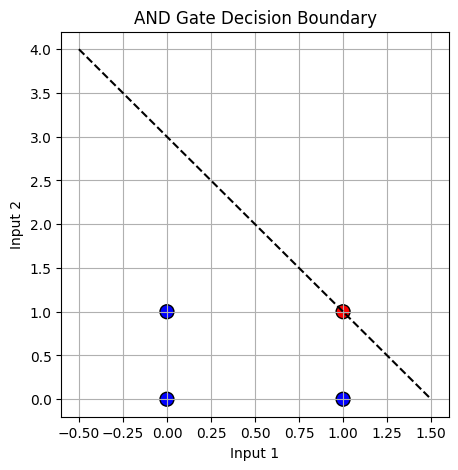

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Take input from user
# -------------------------------
gate = input("Enter gate type (AND / OR): ").strip().upper()
lr = float(input("Enter learning rate (e.g., 0.1): "))
epochs = int(input("Enter number of epochs (e.g., 10): "))

# -------------------------------
# Step 2: Define input and output data
# -------------------------------
X = np.array([[0,0], [0,1], [1,0], [1,1]])

if gate == "AND":
    y = np.array([0, 0, 0, 1])
elif gate == "OR":
    y = np.array([0, 1, 1, 1])
else:
    print("Invalid gate! Please enter AND or OR.")
    exit()

# -------------------------------
# Step 3: Initialize parameters
# -------------------------------
w = np.zeros(X.shape[1])   # weights [0, 0]
b = 0                      # bias
print("\nInitial weights:", w, "Bias:", b)

# -------------------------------
# Step 4: Train perceptron
# -------------------------------
for _ in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b            # weighted sum
        y_pred = 1 if z >= 0 else 0        # activation
        w += lr * (y[i] - y_pred) * X[i]   # weight update
        b += lr * (y[i] - y_pred)          # bias update

print("\nFinal weights:", w, "Bias:", b)

# -------------------------------
# Step 5: Test accuracy
# -------------------------------
y_pred_all = [1 if np.dot(x, w) + b >= 0 else 0 for x in X]
accuracy = np.mean(y_pred_all == y)
print("Accuracy:", round(accuracy * 100, 2), "%")

# -------------------------------
# -------------------------------
# Step 6: Simplified Visualization
# -------------------------------
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=100, edgecolors='k')

# Plot decision boundary only if w[1] is not zero
if w[1] != 0:
    x_vals = np.linspace(-0.5, 1.5, 100)
    plt.plot(x_vals, -(w[0]*x_vals + b)/w[1], 'k--')

plt.title(f'{gate} Gate Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()

